In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
data = pd.read_excel('Absenteeism.xls')

In [3]:
#checking the shapes
data.shape

(740, 21)

In [4]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
#checking the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [6]:
#checking for the null values
data.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [7]:
# filling the missing values by the most frequesnt value in that column.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp=imp.fit(data.values[:,0:21])
data.iloc[:,0:21]=imp.transform(data.iloc[:,0:21])

In [8]:
#now missing values are removed
data.isnull().sum()


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

Missing values filled

In [9]:
#To find the correlation between each column of data.
data.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.063543,0.003713,0.034468,0.098495,-0.220339,-0.484599,-0.262452,0.037890,0.085654,...,0.003468,-0.036254,0.004699,-0.451760,-0.010826,-0.039825,-0.251922,0.075548,-0.281571,-0.020412
Reason for absence,-0.063543,1.000000,-0.083154,0.115009,-0.117351,-0.118199,0.160590,0.055132,-0.075764,-0.132806,...,-0.538084,-0.046784,-0.060249,0.064536,-0.115428,-0.054877,0.001328,-0.079433,0.040792,-0.200085
Month of absence,0.003713,-0.083154,1.000000,-0.010572,0.404220,0.133577,-0.006726,-0.069186,-0.001679,-0.166591,...,0.105196,-0.064942,0.071189,0.057573,-0.037835,0.048841,0.016135,-0.068585,0.053293,0.027415
Day of the week,0.034468,0.115009,-0.010572,1.000000,0.046493,0.030670,0.116193,0.021883,0.004127,0.003900,...,-0.007151,0.058516,0.093588,0.041951,0.013156,-0.029663,-0.126673,-0.080014,-0.103284,-0.114389
Seasons,0.098495,-0.117351,0.404220,0.046493,1.000000,0.036533,-0.065210,-0.009665,-0.014290,0.138890,...,0.145668,-0.002951,0.035799,-0.042425,-0.048671,0.013780,-0.027912,-0.033140,-0.004976,-0.000483
Transportation expense,-0.220339,-0.118199,0.133577,0.030670,0.036533,1.000000,0.252127,-0.348422,-0.226193,0.003130,...,0.109792,-0.054095,0.382002,0.137120,0.047393,0.393028,-0.206533,-0.193171,-0.128940,0.045881
Distance from Residence to Work,-0.484599,0.160590,-0.006726,0.116193,-0.065210,0.252127,1.000000,0.123527,-0.143992,-0.079934,...,-0.065935,-0.260536,0.050852,0.449801,-0.075865,0.206603,-0.044815,-0.354498,0.109535,-0.100133
Service time,-0.262452,0.055132,-0.069186,0.021883,-0.009665,-0.348422,0.123527,1.000000,0.661027,0.027371,...,0.000102,-0.215871,-0.051246,0.346424,0.070107,-0.439734,0.450827,-0.055801,0.483553,0.013788
Age,0.037890,-0.075764,-0.001679,0.004127,-0.014290,-0.226193,-0.143992,0.661027,1.000000,-0.039636,...,0.107084,-0.219173,0.063284,0.209696,0.123062,-0.227834,0.418983,-0.061463,0.440653,0.076658
Work load Average/day,0.085654,-0.132806,-0.166591,0.003900,0.138890,0.003130,-0.079934,0.027371,-0.039636,1.000000,...,0.036793,-0.064134,0.026997,-0.031863,0.037825,-0.006924,-0.027328,0.108420,-0.069848,0.022790


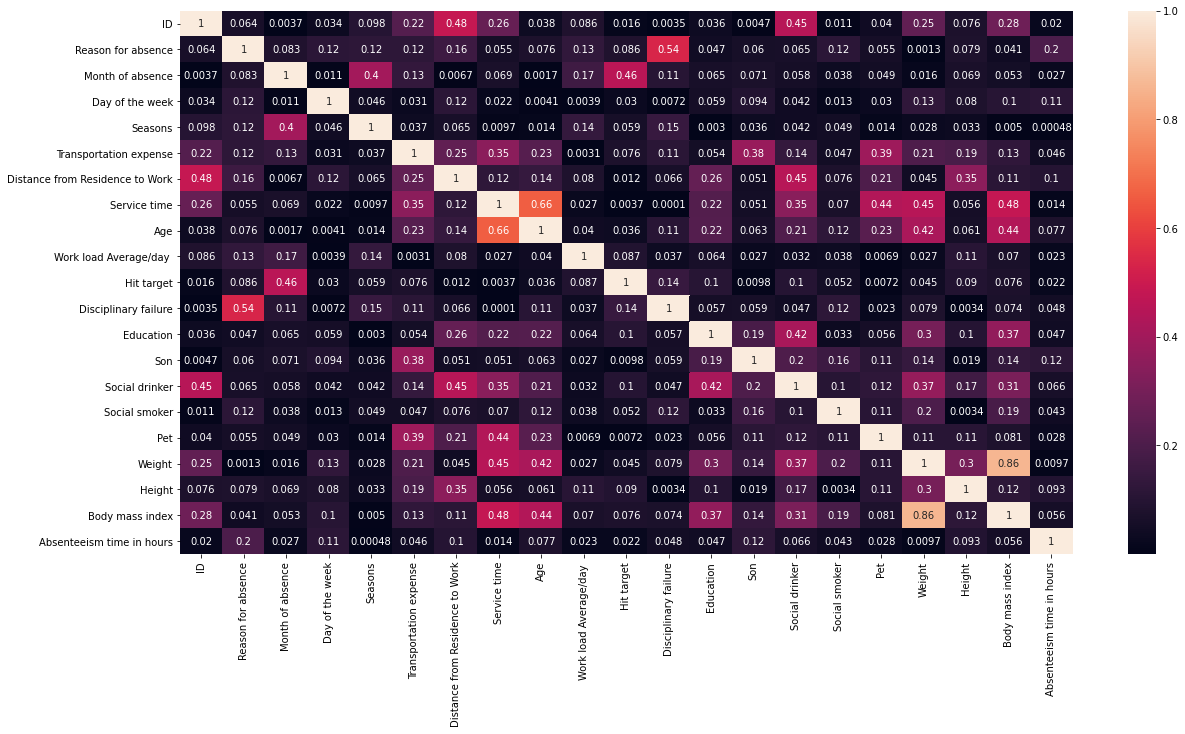

In [10]:
#To visualize that correlation we'll use heatmap.
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)
plt.show()

In [11]:
#to find the correaltion of absenteeism time in hours with every other column
c=data.corr()
cm=c['Absenteeism time in hours']
cm

ID                                -0.020412
Reason for absence                -0.200085
Month of absence                   0.027415
Day of the week                   -0.114389
Seasons                           -0.000483
Transportation expense             0.045881
Distance from Residence to Work   -0.100133
Service time                       0.013788
Age                                0.076658
Work load Average/day              0.022790
Hit target                         0.022126
Disciplinary failure              -0.048010
Education                         -0.046744
Son                                0.117450
Social drinker                     0.065527
Social smoker                      0.042515
Pet                               -0.028020
Weight                            -0.009661
Height                             0.093374
Body mass index                   -0.056243
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64

In [12]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.204054,6.314865,3.914865,2.544595,220.637838,29.652703,12.587838,36.414865,270526.794595,...,0.052703,1.291892,1.009459,0.568919,0.072973,0.744595,79.077027,172.112162,26.864865,7.008108
std,11.021247,8.423836,3.435790,1.421675,1.111831,66.760604,14.819790,4.394499,6.489258,39128.835257,...,0.223590,0.673238,1.094292,0.495562,0.260268,1.318510,12.865107,6.030335,4.289977,13.275979
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,241476.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


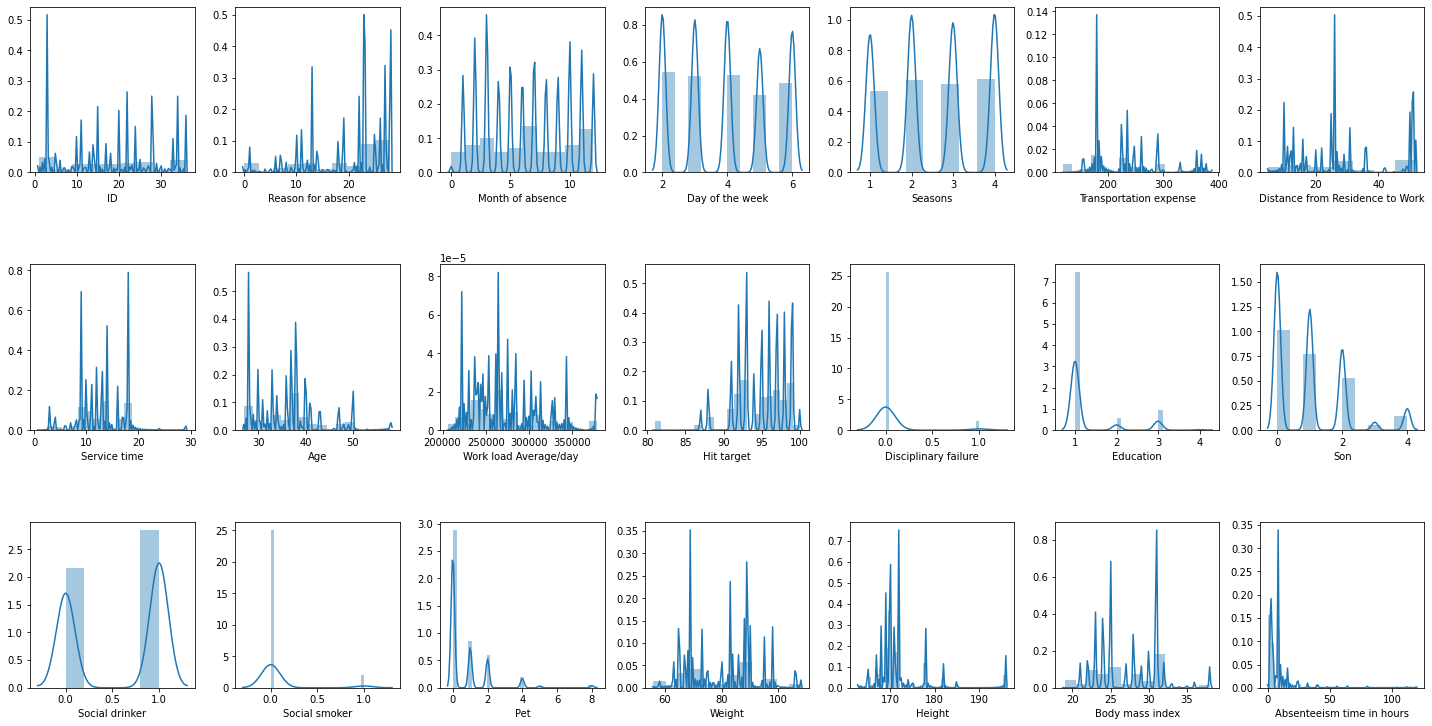

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index],kde_kws={'bw': 0.1}) 
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

<h3> Here 11,14,15 i.e Discipline,Social drinker,Social Smoker are discrete values(0/1).

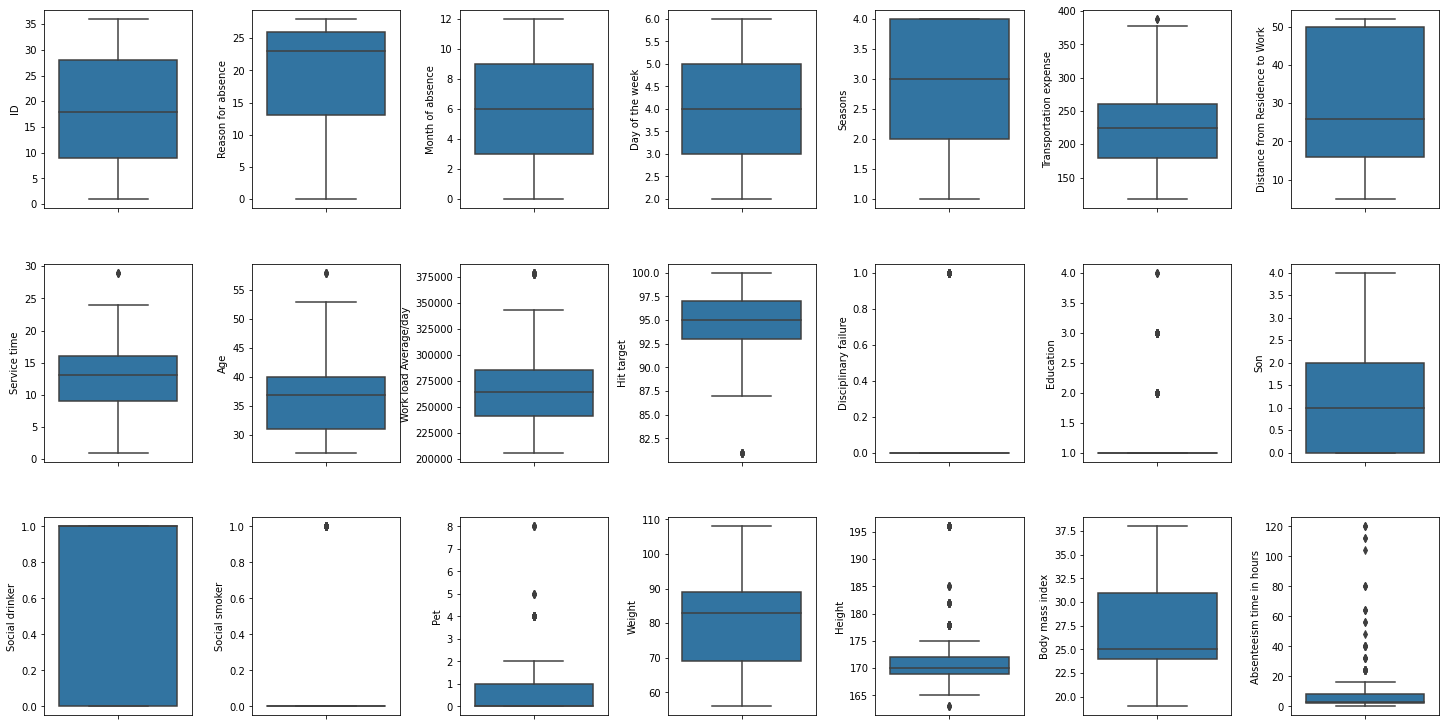

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()#to flatten to 1D
for k,v in data.items():
    sns.boxplot(y=v, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

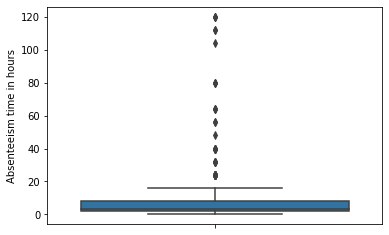

In [15]:
# we need to handle outliers in Absenteeism time in hours

sns.boxplot(data["Absenteeism time in hours"],orient="vertical")
plt.show()

In [16]:
#deleting the rows where absenteeism time in hours is greater than 100
data=data[~(data['Absenteeism time in hours'] >= 100)]
print(np.shape(data))

(734, 21)


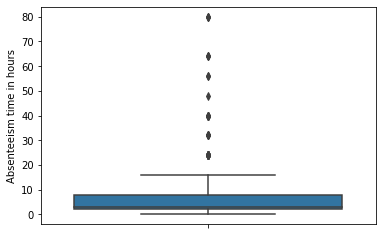

In [17]:
sns.boxplot(data['Absenteeism time in hours'],orient="vertical")
plt.show()

<h3>6 rows are deleted in handling outliers for target.

In [18]:
#no need of id,height and weight (as we already have BMI) so droppning it
data = data.drop(['ID','Height','Weight'], axis=1)

NOW WE'LL Evaluate values of features and will try to group them and then find their relation with absenteeism time in hours

In [19]:
data[['Seasons','Absenteeism time in hours']].groupby(['Seasons'],as_index=False).mean()

,Seasons,Absenteeism time in hours
0,1.0,6.041667
1,2.0,5.445026
2,3.0,7.093923
3,4.0,5.974227


In [20]:
data[['Day of the week','Absenteeism time in hours']].groupby(['Day of the week'],as_index=False).mean()

,Day of the week,Absenteeism time in hours
0,2.0,8.006250
1,3.0,5.880000
2,4.0,6.522581
3,5.0,4.552000
4,6.0,5.243056


In [21]:
data['AgeBand'] = pd.cut(data['Age'],5) ## Need to save in another column to discover the ageband, then we can replace in the age feature

In [22]:
data[['AgeBand','Absenteeism time in hours']].groupby('AgeBand', as_index=False).mean()

,AgeBand,Absenteeism time in hours
0,"(26.969, 33.2]",6.003802
1,"(33.2, 39.4]",6.148014
2,"(39.4, 45.6]",7.307018
3,"(45.6, 51.8]",4.835616
4,"(51.8, 58.0]",4.285714


In [23]:
data.drop(["AgeBand"],axis=1,inplace=True)

In [24]:
data[['Month of absence','Absenteeism time in hours']].groupby(['Month of absence'],as_index=False).mean()

,Month of absence,Absenteeism time in hours
0,0.0,0.000000
1,1.0,4.440000
2,2.0,4.083333
3,3.0,6.511628
4,4.0,6.961538
5,5.0,6.375000
6,6.0,7.611111
7,7.0,7.815385
8,8.0,5.333333
9,9.0,5.811321


In [25]:
# for social drinkers 
data[['Social drinker','Absenteeism time in hours']].groupby(['Social drinker'],as_index=False).mean()

,Social drinker,Absenteeism time in hours
0,0.0,4.977848
1,1.0,6.997608


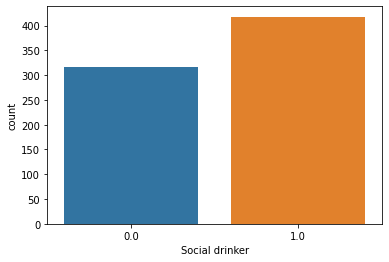

In [26]:
#visualization
sns.countplot(data['Social drinker'])
plt.show()

In [27]:
# for social smokers 
data[['Social smoker','Absenteeism time in hours']].groupby(['Social smoker'],as_index=False).mean()

,Social smoker,Absenteeism time in hours
0,0.0,6.066079
1,1.0,6.924528


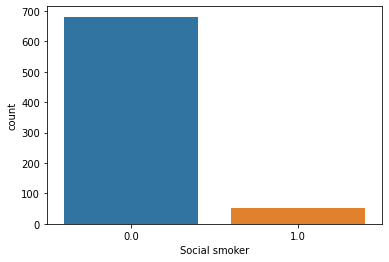

In [28]:
#visualization
sns.countplot(data['Social smoker'])
plt.show()

In [29]:
data[['Son','Absenteeism time in hours']].groupby(['Son'],as_index=False).mean()

,Son,Absenteeism time in hours
0,0.0,5.438538
1,1.0,5.243363
2,2.0,7.794702
3,3.0,12.200000
4,4.0,7.707317


In [30]:
data[['Pet','Absenteeism time in hours']].groupby(['Pet'],as_index=False).mean()

,Pet,Absenteeism time in hours
0,0.0,6.424837
1,1.0,6.761194
2,2.0,3.684211
3,4.0,7.312500
4,5.0,4.166667
5,8.0,4.250000


In [31]:
pre_data=data

In [32]:
#now exploring the reason for absence attribue
print('Minimum values is :',pre_data['Reason for absence'].min())
print('Maximum values is :' ,pre_data['Reason for absence'].max())

Minimum values is : 0.0
Maximum values is : 28.0


In [33]:
#checking for the unique reason nos
pd.unique(pre_data['Reason for absence'])

array([26.,  0., 23.,  7., 22., 19.,  1., 11., 14., 21., 10., 13., 28.,
       18., 25., 24.,  6., 27., 17.,  8., 12.,  5.,  9., 15.,  4.,  3.,
        2., 16.])

In [34]:
len(pd.unique(pre_data['Reason for absence']))

28

In [35]:
sorted(pd.unique(pre_data['Reason for absence']))

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0]

In [37]:
#as we can see there are total 29 reasons from 0 to 28 but the length was 28 so onereason i.e. 20 is missing.

In [38]:
#dummy variable for the reason for absence column
reason_column = pd.get_dummies(pre_data['Reason for absence'])

In [39]:
#to check whether the employye is absent for single reason only
reason_column['check']=reason_column.sum(axis=1)
reason_column

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
737,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
738,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
print(reason_column['check'].sum(axis=0))
print(reason_column['check'].unique())

734
[1]


In [41]:
#now it is verified that employee is absent for single reason only.

In [42]:
#dropping the check column
reason_column = reason_column.drop(['check'], axis = 1)
reason_column

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,18.0,19.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
737,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
738,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#drop reason 0 column
reason_column = pd.get_dummies(pre_data['Reason for absence'], drop_first = True)

In [44]:
#group the reason for absence
pre_data.columns.values

array(['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Body mass index', 'Absenteeism time in hours'], dtype=object)

In [45]:
#dropping the reason for absence column
pre_data = pre_data.drop(['Reason for absence'], axis=1)

In [46]:
#Gropuing the reasons into 4 grops
reason_type1= reason_column.loc[:, 1:14].max(axis=1)
reason_type2= reason_column.loc[:, 15:17].max(axis=1)
reason_type3= reason_column.loc[:, 18:21].max(axis=1)
reason_type4= reason_column.loc[:, 22:].max(axis=1)

In [47]:
#concatinate the reason_type columns
pre_data = pd.concat([pre_data,reason_type1,reason_type2,reason_type3,reason_type4], axis=1)
pre_data

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,0,1,2,3
0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,2.0,1.0,0.0,1.0,30.0,4.0,0,0,0,1
1,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,...,1.0,1.0,0.0,0.0,31.0,0.0,0,0,0,0
2,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,...,0.0,1.0,0.0,0.0,31.0,2.0,0,0,0,1
3,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,...,2.0,1.0,1.0,0.0,24.0,4.0,1,0,0,0
4,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,2.0,1.0,0.0,1.0,30.0,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,7.0,3.0,1.0,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,...,2.0,1.0,0.0,1.0,30.0,8.0,1,0,0,0
736,7.0,3.0,1.0,235.0,11.0,14.0,37.0,264604.0,93.0,0.0,...,1.0,0.0,0.0,1.0,29.0,4.0,1,0,0,0
737,0.0,3.0,1.0,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,...,1.0,1.0,0.0,8.0,34.0,0.0,0,0,0,0
738,0.0,4.0,2.0,231.0,35.0,14.0,39.0,271219.0,95.0,0.0,...,2.0,1.0,0.0,2.0,35.0,0.0,0,0,0,0


In [48]:
pre_data.columns.values

array(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours', 0, 1, 2, 3], dtype=object)

In [49]:
#rearranging the columns
column_name = ['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [50]:
pre_data.columns = column_name

In [51]:
pre_data.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,Reason_1,Reason_2,Reason_3,Reason_4
0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,2.0,1.0,0.0,1.0,30.0,4.0,0,0,0,1
1,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,...,1.0,1.0,0.0,0.0,31.0,0.0,0,0,0,0
2,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,...,0.0,1.0,0.0,0.0,31.0,2.0,0,0,0,1
3,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,...,2.0,1.0,1.0,0.0,24.0,4.0,1,0,0,0
4,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,2.0,1.0,0.0,1.0,30.0,2.0,0,0,0,1


In [52]:
columns_reordered =['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours']

In [53]:
pre_data=pre_data[columns_reordered] 

In [54]:
#creating a copy of new dataset
new_data = pre_data.copy()

In [55]:
new_data.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,...,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,0,0,0,1,7.0,3.0,1.0,289.0,36.0,13.0,...,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,30.0,4.0
1,0,0,0,0,7.0,3.0,1.0,118.0,13.0,18.0,...,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,31.0,0.0
2,0,0,0,1,7.0,4.0,1.0,179.0,51.0,18.0,...,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,31.0,2.0
3,1,0,0,0,7.0,5.0,1.0,279.0,5.0,14.0,...,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,24.0,4.0
4,0,0,0,1,7.0,5.0,1.0,289.0,36.0,13.0,...,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,30.0,2.0


In [56]:
#working on the education column
new_data['Education'].unique()

array([1., 3., 2., 4.])

In [57]:
new_data['Education'].value_counts()

1.0    605
3.0     79
2.0     46
4.0      4
Name: Education, dtype: int64

In [58]:
#combining the last three categories into 1
new_data['Education']=new_data['Education'].map({1:0,2:1,3:1,4:1})

In [59]:
new_data['Education'].unique()

array([0, 1], dtype=int64)

In [60]:
new_data['Education'].value_counts()

0    605
1    129
Name: Education, dtype: int64

In [61]:
new_data.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,...,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,0,0,0,1,7.0,3.0,1.0,289.0,36.0,13.0,...,239554.0,97.0,0.0,0,2.0,1.0,0.0,1.0,30.0,4.0
1,0,0,0,0,7.0,3.0,1.0,118.0,13.0,18.0,...,239554.0,97.0,1.0,0,1.0,1.0,0.0,0.0,31.0,0.0
2,0,0,0,1,7.0,4.0,1.0,179.0,51.0,18.0,...,239554.0,97.0,0.0,0,0.0,1.0,0.0,0.0,31.0,2.0
3,1,0,0,0,7.0,5.0,1.0,279.0,5.0,14.0,...,239554.0,97.0,0.0,0,2.0,1.0,1.0,0.0,24.0,4.0
4,0,0,0,1,7.0,5.0,1.0,289.0,36.0,13.0,...,239554.0,97.0,0.0,0,2.0,1.0,0.0,1.0,30.0,2.0


In [62]:
preprocessed_data= new_data.copy()

In [63]:
#creating a new dataset of preprocessed data
preprocessed_data.to_excel('Absenteeism_preprocessed.xls', index=False)

End of Data Preprocessing